In [1]:
## EDIT:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

In [2]:
import xarray as xr
import numpy as np
# import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow import keras
from tensorflow.keras import layers
import time

import sys
sys.path.append(base_dir+'functions/')
from utils import split_SDbias, plot_results
from exp_hp import get_hp

2024-08-07 11:39:20.477062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


### Fuctions

In [3]:
# ---------------- LEARNING RATE CALLBACK FUNCTION ----------------
# def scheduler(epoch, lr):
#     # This function keeps the initial learning rate for the first ten epochs
#     # and decreases it exponentially after that.
#     if epoch%10 != 0 or epoch == 0:
#         return lr
#     elif epoch%10 == 0 and epoch > 0:
#         return lr * tf.constant(.5,dtype=tf.float32)

In [4]:
def create_ann(input_shape, n_output, hiddens, RIDGE = 0, dropout = True, dropout_rate = 0.0):
    tf.keras.backend.clear_session() 

    # ----- input of cnn -----
    ann_input = keras.Input(shape = input_shape)

    for l,layer in enumerate(hiddens):
        # ----- ann layers -----
        if l == 0:
            x = tf.keras.layers.Dense(layer, 
                                      activation = 'relu',
                                      use_bias = True, 
                                      kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=RIDGE),
                                      bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                      kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(ann_input)
            if dropout:
                x = layers.Dropout(rate = dropout_rate)(x)
        else:
            x = tf.keras.layers.Dense(layer, 
                                      activation = 'relu',
                                      use_bias = True, 
                                      kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=0.0),
                                      bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                      kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(x)
        
    # ----- output -----
    ann_output = tf.keras.layers.Dense(n_output,
                                       activation = tf.keras.activations.softmax,
                                       use_bias = True,
                                       kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=0.0),
                                       bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                       kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(x)
    # ----- create unet -----
    ann = keras.Model(ann_input, ann_output, name = 'ann')
    
    return ann

### Train NN

Training Members: ['0101', '0111']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.95 30
0
Elapsed time during fit = 27.47 seconds



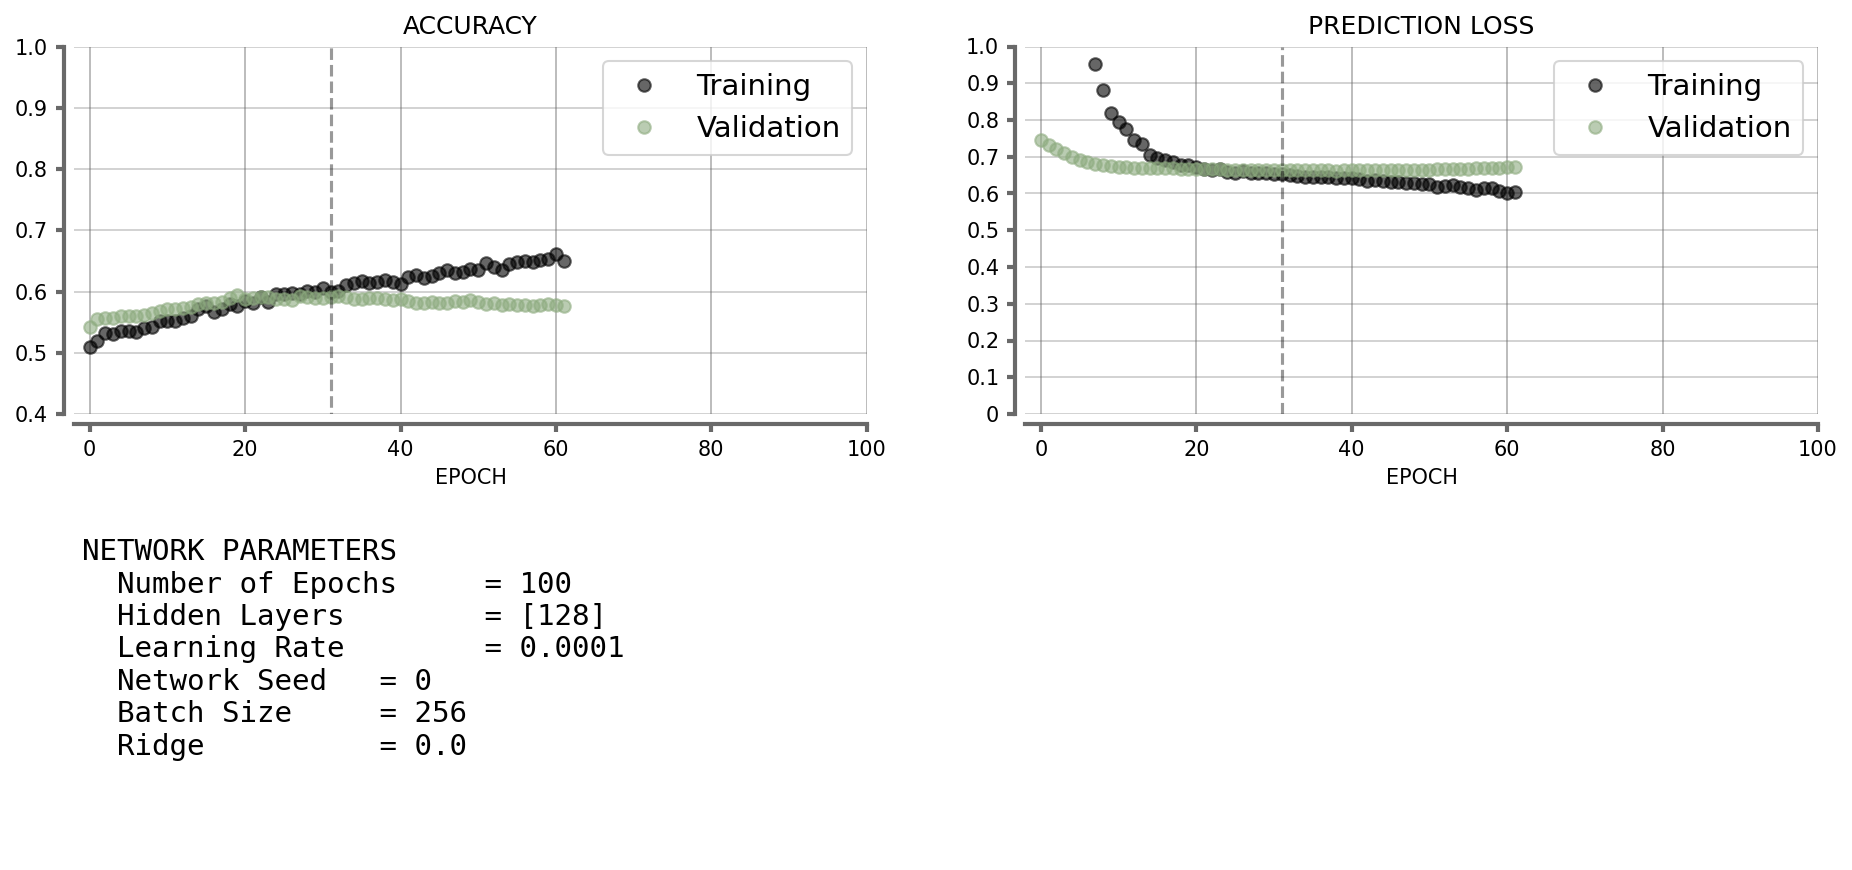

1
Elapsed time during fit = 27.80 seconds

2
Elapsed time during fit = 29.59 seconds

3
Elapsed time during fit = 29.45 seconds

4
Elapsed time during fit = 28.15 seconds

5
Elapsed time during fit = 26.00 seconds

6
Elapsed time during fit = 29.60 seconds

7
Elapsed time during fit = 30.29 seconds

8
Elapsed time during fit = 26.11 seconds

9
Elapsed time during fit = 28.00 seconds

Training Members: ['0101', '0111', '0121']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.95 30
0
Elapsed time during fit = 40.34 seconds



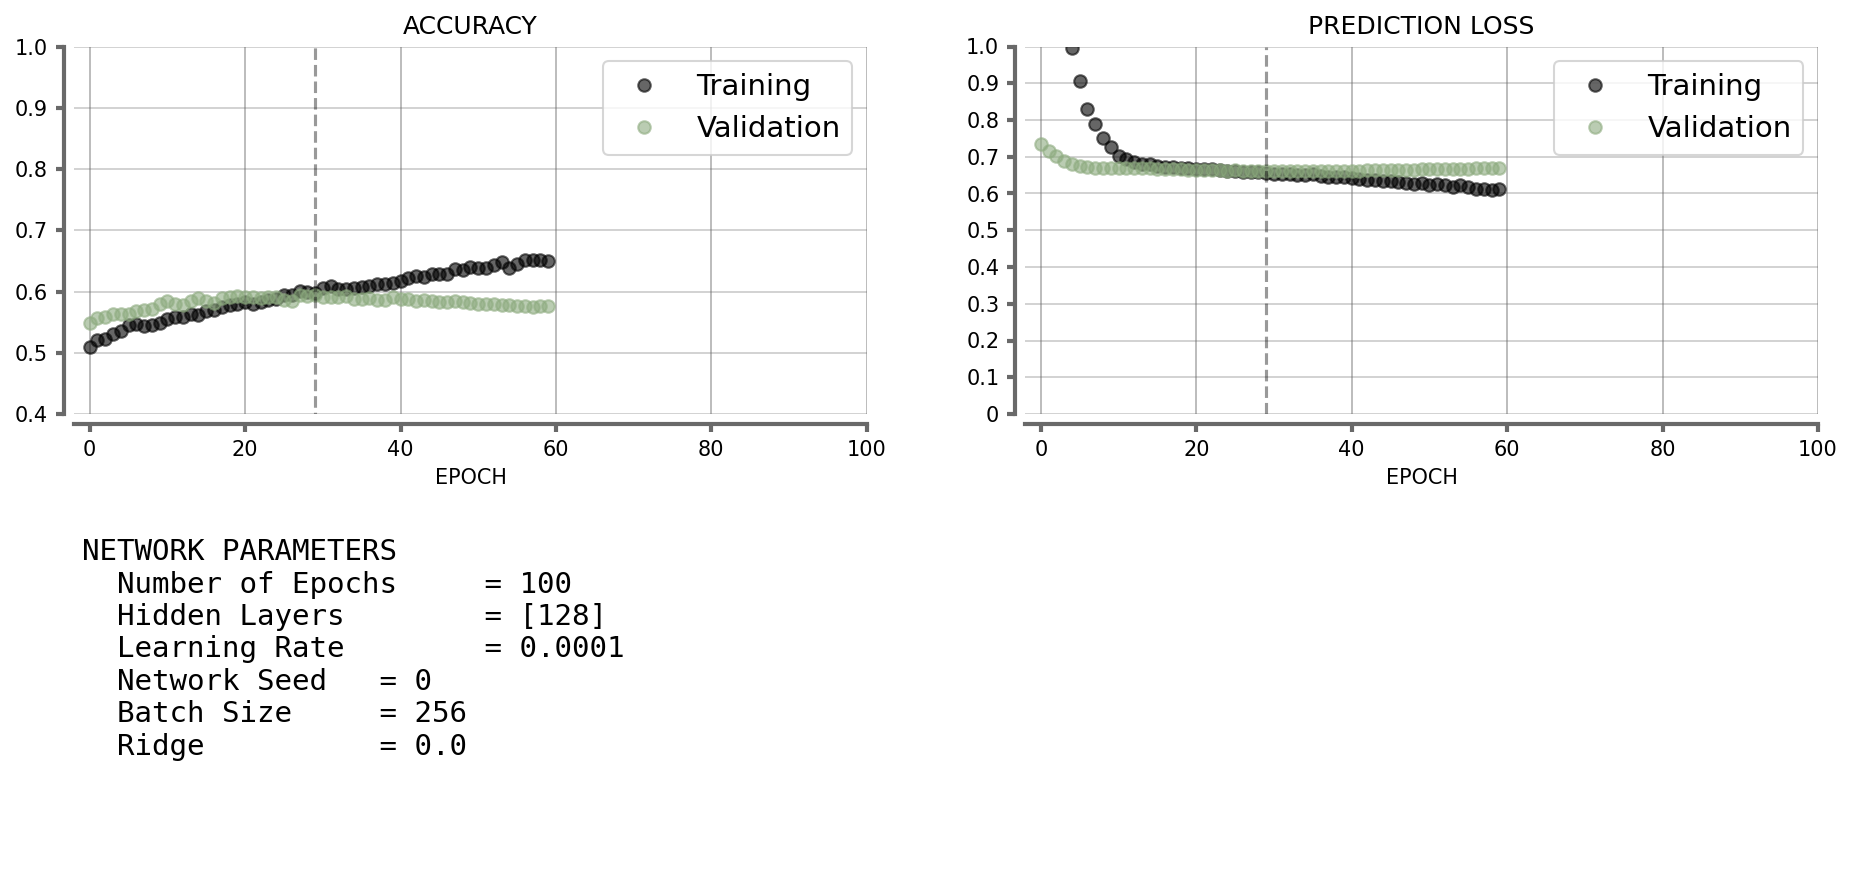

1
Elapsed time during fit = 45.43 seconds

2
Elapsed time during fit = 38.86 seconds

3
Elapsed time during fit = 37.12 seconds

4
Elapsed time during fit = 38.15 seconds

5
Elapsed time during fit = 38.27 seconds

6
Elapsed time during fit = 35.57 seconds

7
Elapsed time during fit = 40.41 seconds

8
Elapsed time during fit = 37.71 seconds

9
Elapsed time during fit = 40.45 seconds

Training Members: ['0101', '0111', '0121', '0131']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.95 30
0
Elapsed time during fit = 49.15 seconds



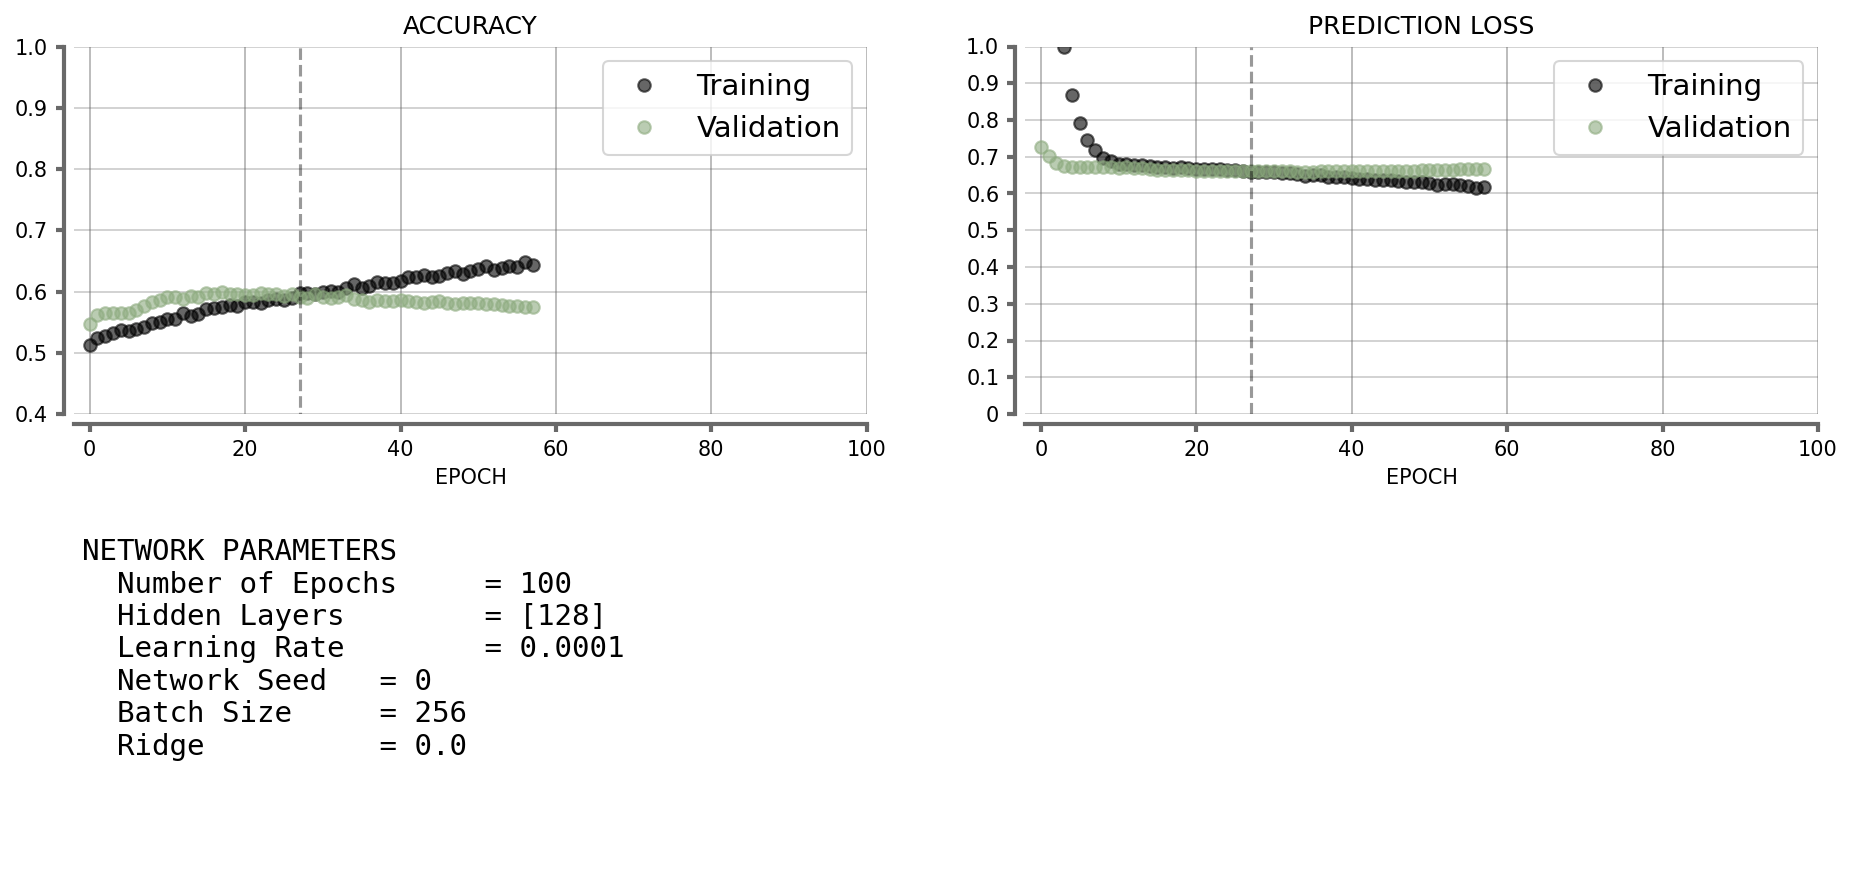

1
Elapsed time during fit = 53.20 seconds

2
Elapsed time during fit = 88.44 seconds

3
Elapsed time during fit = 49.29 seconds

4
Elapsed time during fit = 45.63 seconds

5
Elapsed time during fit = 44.87 seconds

6
Elapsed time during fit = 49.99 seconds

7
Elapsed time during fit = 46.16 seconds

8
Elapsed time during fit = 46.30 seconds

9
Elapsed time during fit = 54.30 seconds

Training Members: ['0101', '0111', '0121', '0131', '0141']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.9 30
0
Elapsed time during fit = 44.05 seconds



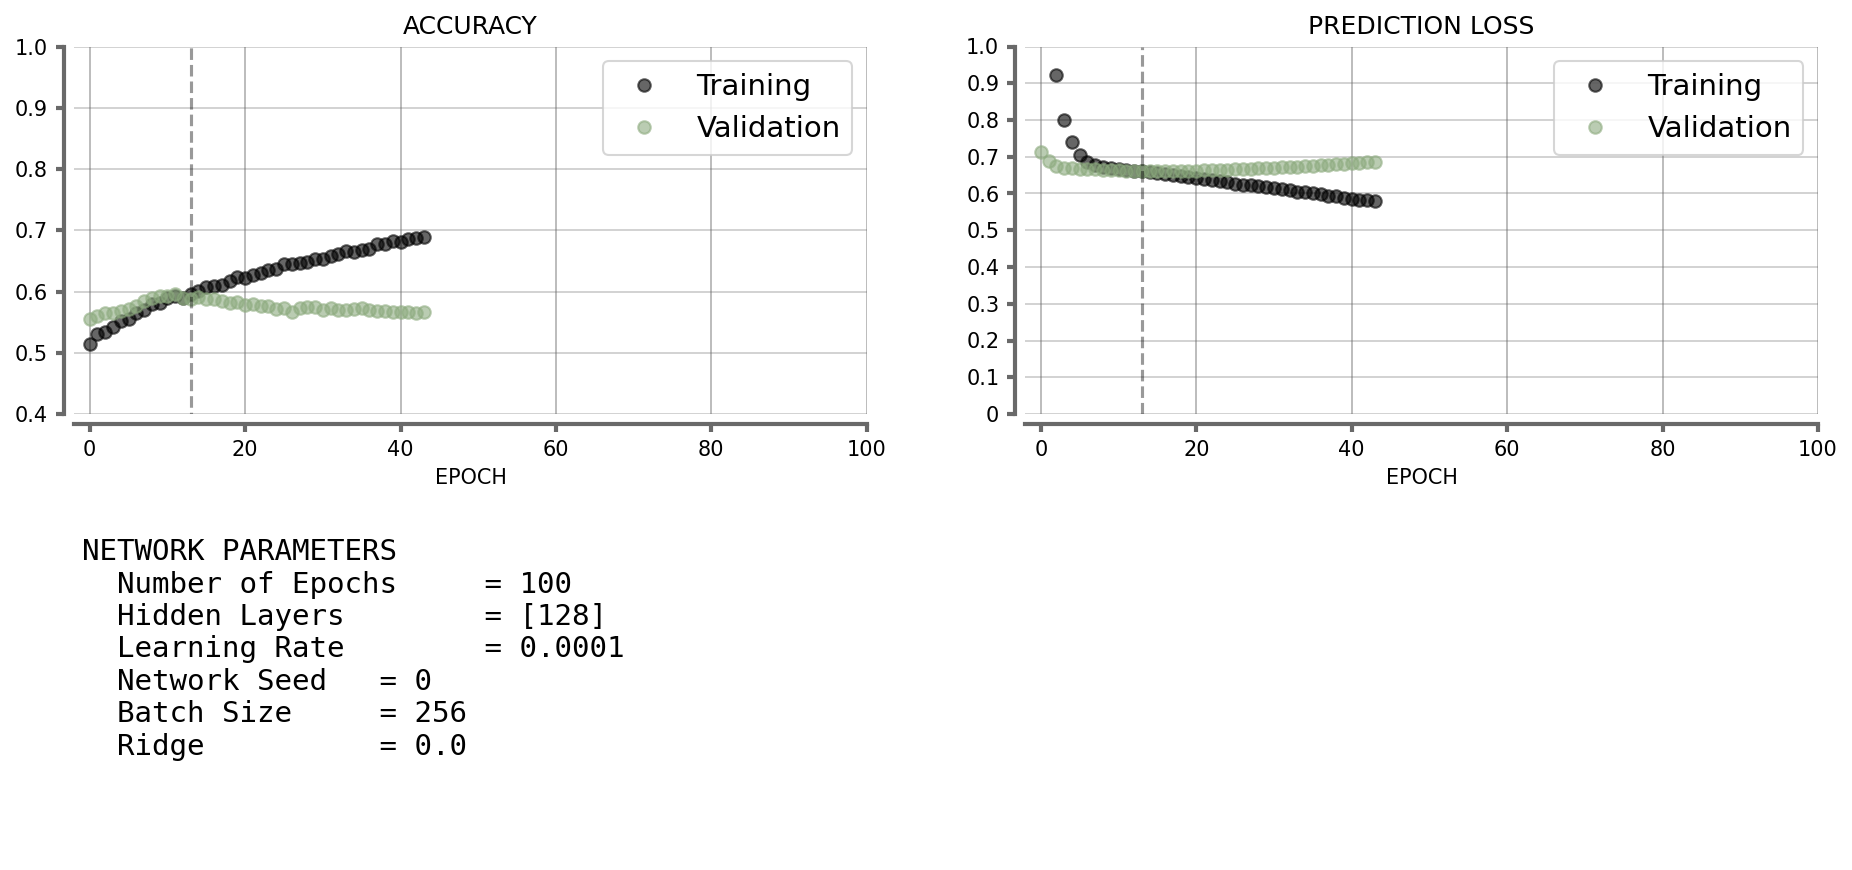

1
Elapsed time during fit = 43.44 seconds

2
Elapsed time during fit = 43.44 seconds

3
Elapsed time during fit = 70.98 seconds

4
Elapsed time during fit = 42.28 seconds

5
Elapsed time during fit = 40.71 seconds

6
Elapsed time during fit = 43.42 seconds

7
Elapsed time during fit = 43.45 seconds

8
Elapsed time during fit = 43.93 seconds

9
Elapsed time during fit = 43.34 seconds

Training Members: ['0101', '0111', '0121', '0131', '0141', '0151']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.9 30
0
Elapsed time during fit = 50.54 seconds



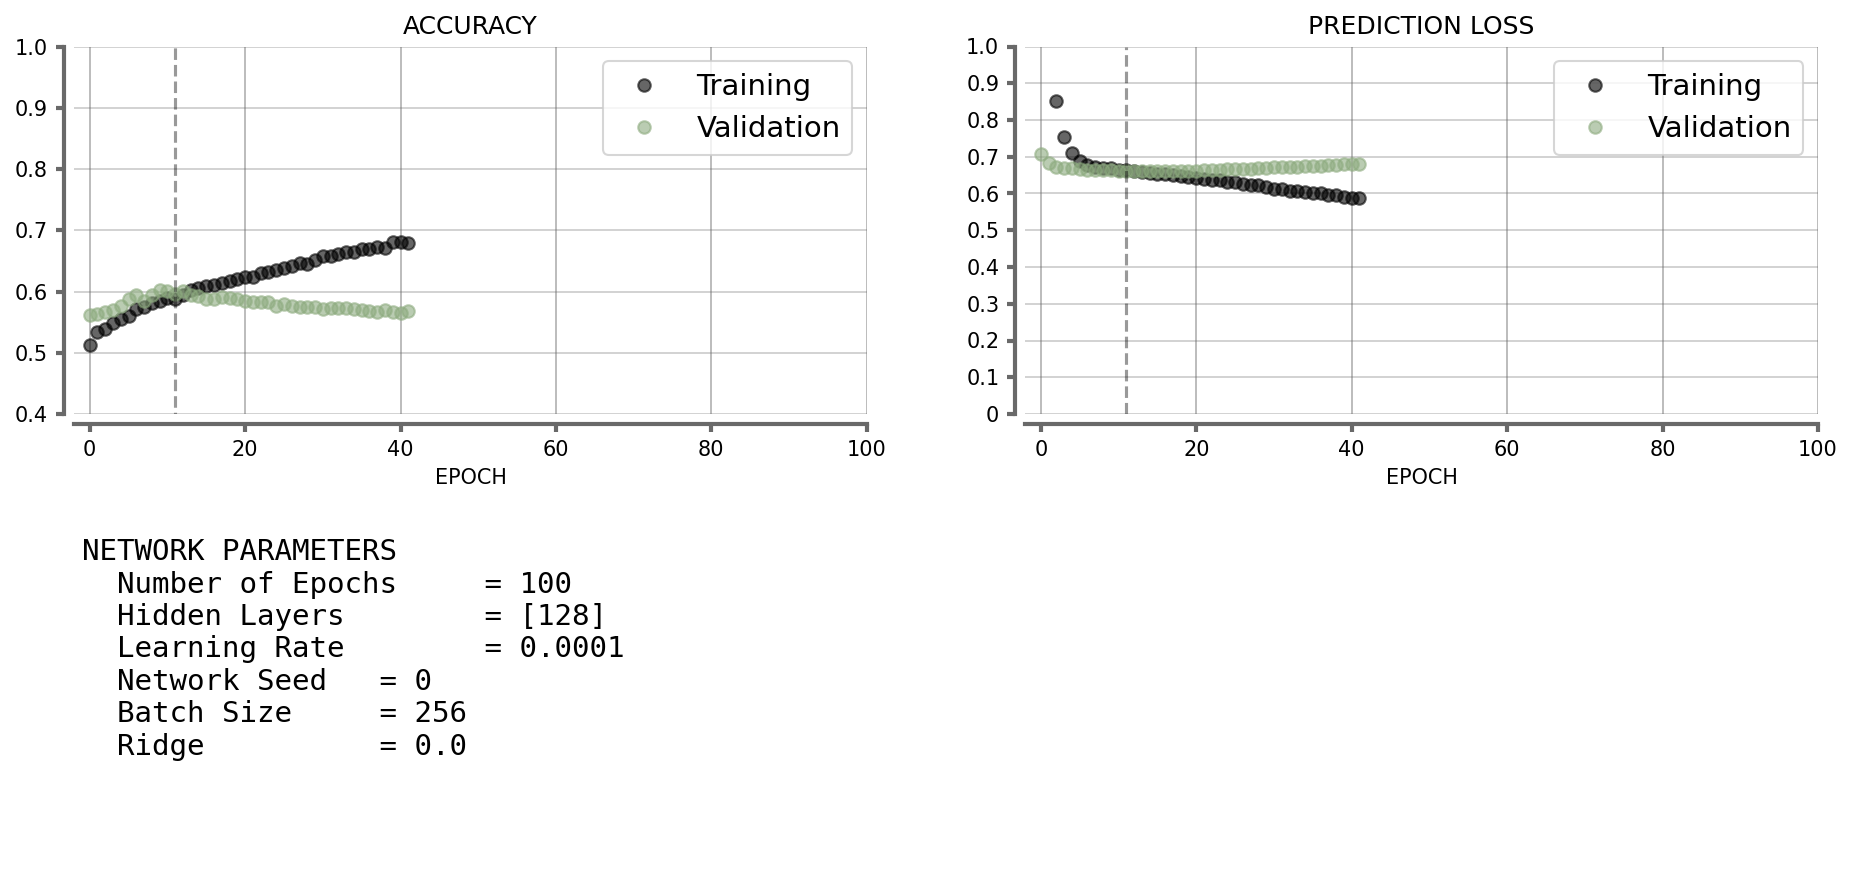

1
Elapsed time during fit = 48.75 seconds

2
Elapsed time during fit = 63.54 seconds

3
Elapsed time during fit = 49.71 seconds

4
Elapsed time during fit = 46.10 seconds

5
Elapsed time during fit = 48.74 seconds

6
Elapsed time during fit = 49.42 seconds

7
Elapsed time during fit = 50.32 seconds

8
Elapsed time during fit = 51.09 seconds

9
Elapsed time during fit = 52.26 seconds

Training Members: ['0101', '0111', '0121', '0131', '0141', '0151', '0161']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.9 30
0
Elapsed time during fit = 58.29 seconds



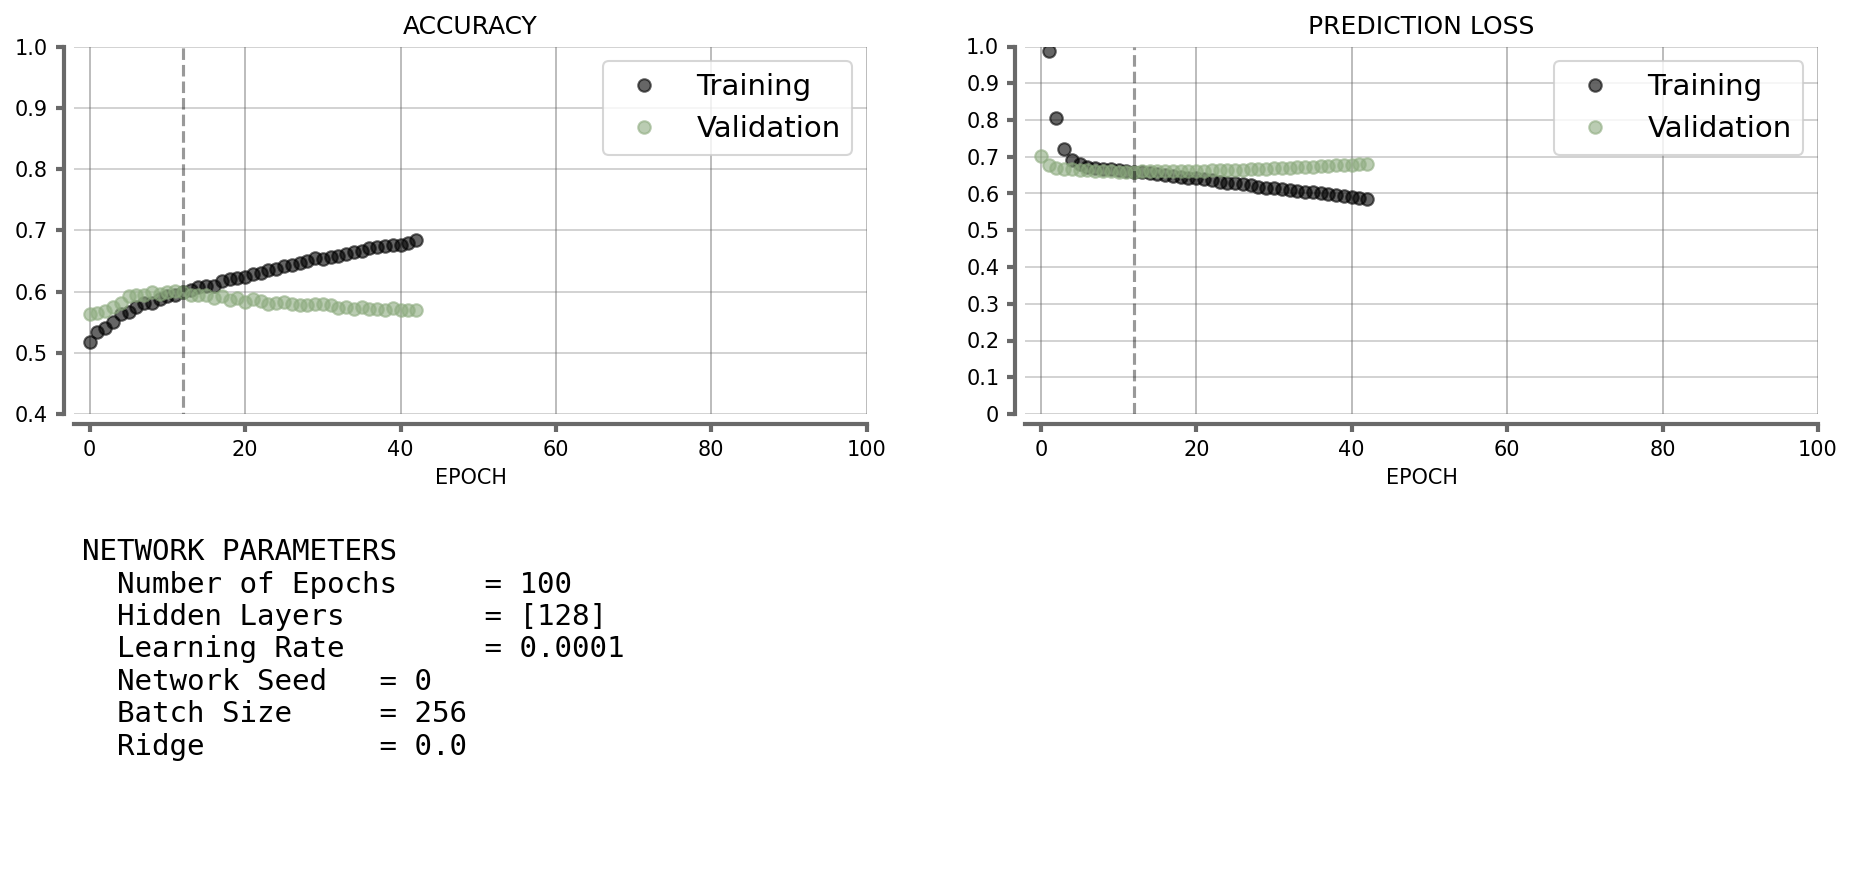

1
Elapsed time during fit = 57.50 seconds

2
Elapsed time during fit = 55.84 seconds

3
Elapsed time during fit = 69.06 seconds

4
Elapsed time during fit = 57.57 seconds

5
Elapsed time during fit = 52.35 seconds

6
Elapsed time during fit = 54.93 seconds

7
Elapsed time during fit = 59.63 seconds

8
Elapsed time during fit = 56.96 seconds

9
Elapsed time during fit = 57.95 seconds

Training Members: ['0101', '0111', '0121', '0131', '0141', '0151', '0161', '0171']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.9 30
0
Elapsed time during fit = 69.69 seconds



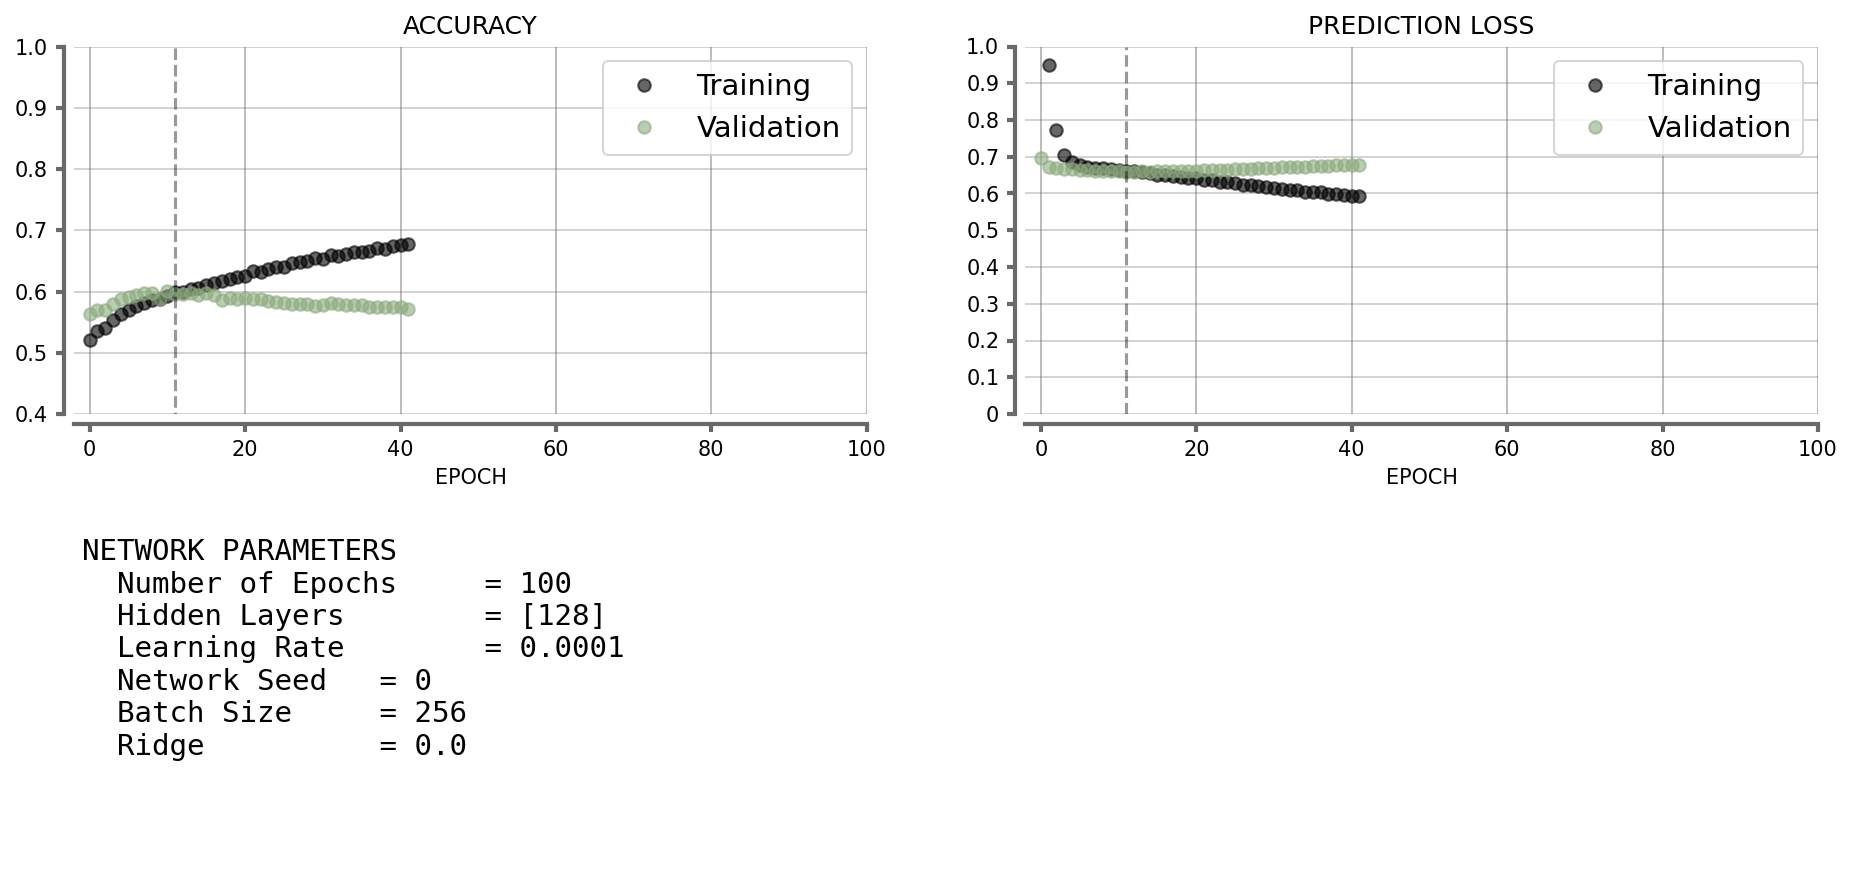

1
Elapsed time during fit = 64.09 seconds

2
Elapsed time during fit = 63.68 seconds

3
Elapsed time during fit = 62.85 seconds

4
Elapsed time during fit = 55.35 seconds

5
Elapsed time during fit = 56.35 seconds

6
Elapsed time during fit = 62.56 seconds

7
Elapsed time during fit = 63.27 seconds

8
Elapsed time during fit = 64.38 seconds

9
Elapsed time during fit = 60.06 seconds

Training Members: ['0101', '0111', '0121', '0131', '0141', '0151', '0161', '0171', '0181']
Validation Member: 0191
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
files do not exist - loading data & saving
[128] 256 0.0001 0.0 0.9 30
0
Elapsed time during fit = 65.57 seconds



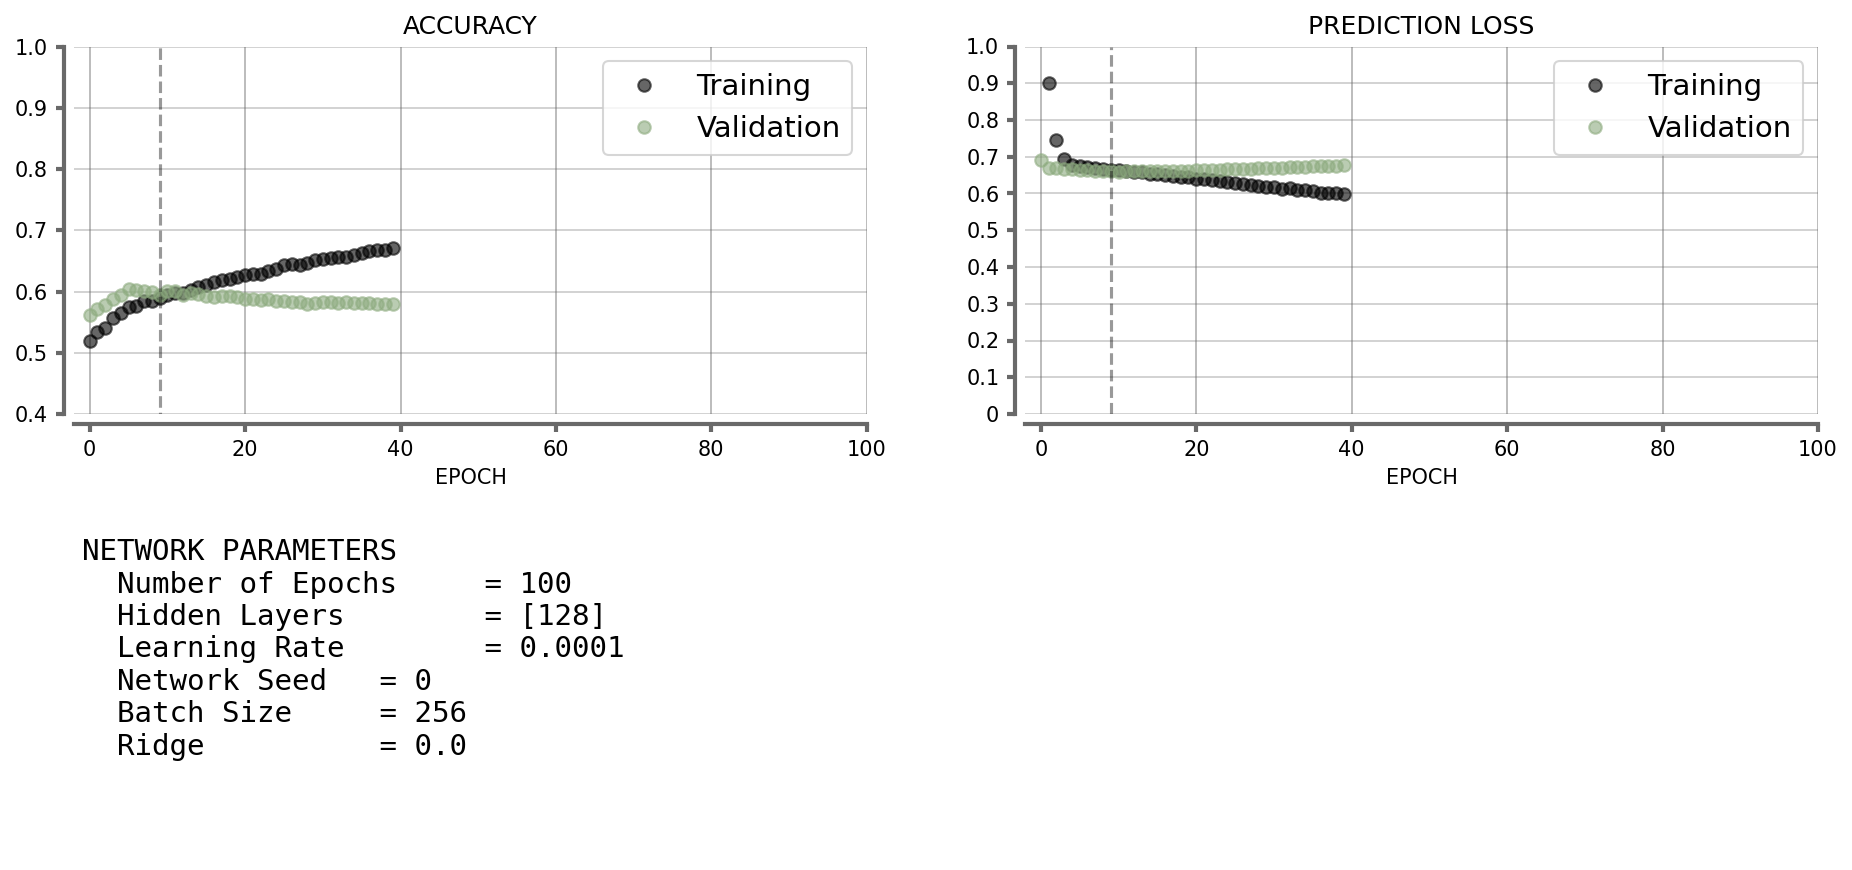

1
Elapsed time during fit = 65.74 seconds

2
Elapsed time during fit = 87.85 seconds

3
Elapsed time during fit = 70.71 seconds

4
Elapsed time during fit = 64.78 seconds

5
Elapsed time during fit = 65.84 seconds

6
Elapsed time during fit = 67.63 seconds

7
Elapsed time during fit = 65.65 seconds

8
Elapsed time during fit = 69.87 seconds

9
Elapsed time during fit = 68.89 seconds



In [6]:
EXP_NAME = 'exp2_train_increase'
hps = get_hp(EXP_NAME)

for i_trainmem in np.arange(1,9):
    print('Training Members: '+str(hps['train_mems'][i_trainmem]))
    print('Validation Member: '+str(hps['val_mems'][0]))
    print('Testing Member: '+str(hps['test_mems'][0]))
    print('Lead: '+str(hps['LEAD']))
    print('Region: '+str(hps['region'][0])+'N x '+str(hps['region'][1])+'E')
    
    Xtrain, Xval, _, Ytrain, Yval, _, _ = split_SDbias(trainmems = hps['train_mems'][i_trainmem],
                                                          valmem = hps['val_mems'][0],
                                                          testmem = hps['test_mems'][0],
                                                          months = [11,12,1,2], # months for X (Y+leadtime are accounted for in function)
                                                          lead = hps['LEAD']) 
    
    Xval = Xval.reshape((Xval.shape[0],Xval.shape[1]*Xval.shape[2]))
    Xtrain = Xtrain.reshape((Xtrain.shape[0],Xtrain.shape[1]*Xtrain.shape[2]))
    input_shape = Xtrain.shape[1]
    
    # ---------- ANN Hyperparameters ----------
    NLABEL = 2
    N_EPOCHS = 1000
    
    HIDDENS = hps['HIDDENS']
    BATCH_SIZE = hps['BATCH_SIZE']
    LR_INIT = hps['LR_INIT']
    RIDGE = hps['RIDGE']
    dropout_rate = hps['DROPOUT_RATE'][i_trainmem]
    PATIENCE = hps['PATIENCE']
    GLOBAL_SEED = hps['GLOBAL_SEED']
    dropout_bool = True
    
    print(HIDDENS,
          BATCH_SIZE,
          LR_INIT,
          RIDGE,
          dropout_rate,
          PATIENCE)
    
    #----- SET UP & TRAIN NN -----
    np.random.seed(GLOBAL_SEED)
    random.seed(GLOBAL_SEED)
    tf.random.set_seed(GLOBAL_SEED)
    
    for SEED in range(10):
        print(SEED)
        tf.keras.backend.clear_session() 
    
        # ------ define NN ------
        ann = create_ann(input_shape = input_shape,
                         n_output = 2,
                         hiddens=HIDDENS,
                         RIDGE = RIDGE,
                         dropout = dropout_bool, dropout_rate = dropout_rate)
    
        # ------ Training Hyperparameters ------
        optimizer = tf.optimizers.Adam(learning_rate = LR_INIT,)
        loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
        metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy", dtype=None)]                             
    
        # ------ Compile Model -----
        ann.compile(optimizer = optimizer,
                    loss = loss_func,
                    metrics = metrics)
    
        # ----- Callbacks -----
        ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', min_delta = 0.001,
                                              patience = PATIENCE, verbose = 0, restore_best_weights = True)
        # LR = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=0)
    
        # ------ Train -----
        start_time = time.time()
        history = ann.fit(Xtrain,Ytrain,
                          validation_data = [Xval,Yval],
                          batch_size = BATCH_SIZE,
                          epochs = N_EPOCHS,
                          shuffle = True,
                          verbose = 0,
                          callbacks = [ES])#,LR])
        stop_time = time.time()
        tf.print(f"Elapsed time during fit = {(stop_time - start_time):.2f} seconds\n")

        if SEED == 0:
            #----- PLOT THE RESULTS -----
            plot_results(
                history,
                exp_info=(100, HIDDENS, LR_INIT, BATCH_SIZE, SEED, PATIENCE, RIDGE),
                showplot=True
            ) 
        
        annfi_name = 'ann_60Eshift_'+EXP_NAME+'.'+str(i_trainmem)+'_seed'+str(SEED)+'.h5'
        ann.save(base_dir+'train/saved_models/'+annfi_name)